## Data Analyst Take Home Assessment

Summary: The Google Ads Dataset is focused on the performance and cost metrics of campaigns we ran. 

### Load Data

In [1]:
# Import the required libraries and configure some settings for plots

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import matplotlib.colors as mcolors
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [2]:
%%html
<style>
    /* Jupyter */
    .rendered_html table,
    /* Jupyter Lab*/
    div[data-mime-type="text-markdown"] table {
        margin-left: 0
    }
</style>

In [3]:
# Import the dataset
df = pd.read_csv('Data-Analyst-Take-Home-Challenge-Dataset.csv', parse_dates = ['Day'])

In [4]:
# Check first 5 rows
df.head()

,Day,Campaign,Ad group,Ad group type,Ad group bid strategy type,Cost,Views,Impr.,Clicks
0,2022-05-31,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,4.76,71.0,207.0,1.0
1,2022-06-07,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,6.40,45.0,225.0,1.0
2,2022-06-20,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,5.21,78.0,299.0,1.0
3,2022-06-29,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,4.74,90.0,283.0,0.0
4,2022-06-13,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,5.22,72.0,249.0,1.0


In [5]:
# Check dataset size
df.shape

(367202, 9)

In [6]:
# Check missing values column wise
df.isnull().sum()

Day                           0
Campaign                      0
Ad group                      0
Ad group type                 0
Ad group bid strategy type    0
Cost                          0
Views                         0
Impr.                         0
Clicks                        0
dtype: int64

In [7]:
# Check duplicates
df.duplicated(keep = False).sum()

0

In [8]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367202 entries, 0 to 367201
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Day                         367202 non-null  datetime64[ns]
 1   Campaign                    367202 non-null  object        
 2   Ad group                    367202 non-null  object        
 3   Ad group type               367202 non-null  object        
 4   Ad group bid strategy type  367202 non-null  object        
 5   Cost                        367202 non-null  float64       
 6   Views                       367202 non-null  float64       
 7   Impr.                       367202 non-null  float64       
 8   Clicks                      367202 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 25.2+ MB


In [9]:
# Descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cost,367202.0,66.102492,332.227685,0.0,0.34,4.02,26.80,28115.19
Views,367202.0,2290.415213,12321.875154,0.0,0.00,28.00,625.00,738040.00
Impr.,367202.0,9095.365529,47216.998076,0.0,42.00,513.00,3511.75,3246620.00
Clicks,367202.0,3.682488,23.552545,0.0,0.00,0.00,1.00,2809.00


In [10]:
# Subset data 
df_withzero = df.loc[(df['Cost'] == 0) & (df['Views'] == 0) & (df['Impr.'] == 0) & (df['Clicks'] == 0)]
df_withzero.shape[0]

1203

> <mark style = "background-color: Golden;">**<font size = "3.5">The dataset includes 367202 rows and 9 columns. There is no missing values, no duplicates. But there are 1203 rows with 0 clicks, 0 impressions, 0 views and 0 cost.</font>**<mark>

### Question 1

Using the table logic below, create a new field labeled, “product_type”. Using this field, sum up the count for each field in this column. Your submission for this question will include 1) The python code you used to create the new column and obtain the count. 2) The returned result. 

|Ad group type|   |Ad group bid strategy type|   |   Product Type     |
|-------------|---|:------------------------:|---|--------------------|
|  In-stream  | & |	      Manual CPV	     | =>|	     TrueView     |
|  In-stream  | & |       Target CPM	     | =>|TrueView for Reach  |
|Non-skippable| & |           *	             | =>|	  Non-skippable   |
|    Bumper   | & |           *	             | =>|  	   Bumper     |
|In-feed video| & |           *	             | =>|  Video Discovery   |


In [11]:
# Create new column Product Type based on logic and conditions required 

def create_new_column(col):
    if col['Ad group type'] == 'In-stream' and col['Ad group bid strategy type'] == 'Manual CPV':
        return 'TrueView'
    elif col['Ad group type'] == 'In-stream' and col['Ad group bid strategy type'] == 'Target CPM':
        return 'TrueView for Reach'
    elif col['Ad group type'] == 'Non-skippable':
        return 'Non-skippable'
    elif col['Ad group type'] == 'Bumper':
        return 'Bumper'
    elif col['Ad group type'] == 'In-feed video':
        return 'Video Discovery'
    
df['Product Type'] = df.apply(lambda x: create_new_column(x), axis = 1)  

In [12]:
df.sample(5)

,Day,Campaign,Ad group,Ad group type,Ad group bid strategy type,Cost,Views,Impr.,Clicks,Product Type
359211,2022-03-08,YT_Non-Skips_Tampa PL039985 - ENG,In-market - Parents,Non-skippable,Target CPM,0.01,0.0,1.0,0.0,Non-skippable
126824,2022-04-10,YT_LF TrV w/DM_Q1-Q2'22_O-2ZQGC-R3_PL034112 - ...,Affinities - Entertainment,In-stream,Manual CPV,3.10,196.0,264.0,0.0,TrueView
219964,2022-03-15,YT_VD_CPM Q1'22 PL036941 [:30s - mOAf71uJsh8] ...,Custom Affinities,In-feed video,Manual CPV,115.24,1581.0,59645.0,0.0,Video Discovery
39695,2022-05-21,YT_VD_Trailer_Kids PT_Q2-Q3'22 PL043226 - #1,Videos,In-feed video,Manual CPV,0.00,0.0,1.0,0.0,Video Discovery
233177,2022-04-10,YT_TrV :15s/:30s_Lake & Porter IN Counties_Q2'...,DD,In-stream,Manual CPV,0.07,4.0,7.0,0.0,TrueView


In [13]:
# Total counts of each product type
product_count_df = pd.DataFrame(df['Product Type'].value_counts())
product_count_df['Percentage'] = (product_count_df['Product Type'] / product_count_df['Product Type'].sum())
product_count_df['Percentage'] = product_count_df['Percentage'].apply(lambda x: "{0:.2%}".format(x))
product_count_df

,Product Type,Percentage
TrueView,229743,62.57%
Non-skippable,57812,15.74%
Bumper,48860,13.31%
TrueView for Reach,16131,4.39%
Video Discovery,14656,3.99%


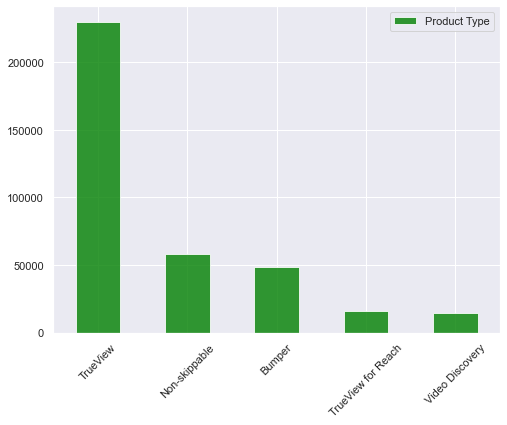

In [14]:
fig, ax = plt.subplots(figsize = (8, 6))
product_count_df = pd.DataFrame(df['Product Type'].value_counts()).plot(kind = 'bar', color = 'Green', alpha = 0.8, ax = ax)
plt.xticks(rotation = 45)
plt.show()

> <mark style = "background-color: Golden;">**<font size = "3.5">Trueview product has the most counts with 229743, around 63% over all products, Video Discovery product has the least counts with 14656, only 4% over all products.</font>**<mark>

### Question 2

For TrueView products in Q1 (Jan 1 - March 31), what day and campaign had the most views? Provide the campaign, day, and view count. Your submission for this question will include 1) The python code you used to obtain your solution and 2) the returned result.

In [15]:
# Subdata based on conditions
Tview_df = df[(df['Day'].between('2022-01-01', '2022-03-31')) & (df['Product Type'] == 'TrueView')]

In [16]:
# Groupby data
groupby_Tview_df = Tview_df.groupby(['Campaign', 'Day'])['Views'].agg(['sum']).sort_values(by = 'sum', ascending = False)
groupby_Tview_df[:5]

sum
Campaign                                           Day                 
YT_TrV_US_Q1'22 FEB PL034029 - Feeling It All  ... 2022-02-01  997723.0
                                                   2022-02-02  989323.0
                                                   2022-02-04  973621.0
                                                   2022-02-06  966233.0
                                                   2022-02-03  963276.0

In [17]:
# Campaign with the most views on a certain day
groupby_Tview_df[:1]

,,sum
Campaign,Day,
YT_TrV_US_Q1'22 FEB PL034029 - Feeling It All - MOB,2022-02-01,997723.0


> <mark>**<font size = "3.5">For TrueView products in Q1 (Jan 1 - March 31), campaign named YT_TrV_US_Q1'22 FEB PL034029 - Feeling It All - MOB on Feb 01 2022 had the most views which was almost one million.</font>**<mark>

### Question 3

Based on this data set, what insights or trends are you able to analyze and share. You are free to use whatever means necessary to complete this step, python is not required for this step.

### Set KPIs:

#### Set KPIs (or develop performance measures or metrics) that are meaningful is important. KPIs should be valuable tools to manage business's performance. Except Clicks, Impressions, Views and Cost in dataset, I am considering to set metrics below:

- Cost per Click (CPC)&emsp;CPC = ad cost / number of clicks
- Cost per view (CPV)&emsp;CPV = total cost / number of views
- Cost per impression (CPI)&emsp;CPI = (total cost / number of ad impressions)*1000
- Click-Through Rate (CTR)&emsp;CTR = number of clicks / number of ad impression
- View-Through Rate (VTR)&emsp;VTR = complete views / impressions

### Overview Analysis

In [18]:
# Copy data to a new dataset 
data = df.copy()

Text(0.5, 1.0, 'Overview of clicks at Ad Group Type Level Over the observed Period')

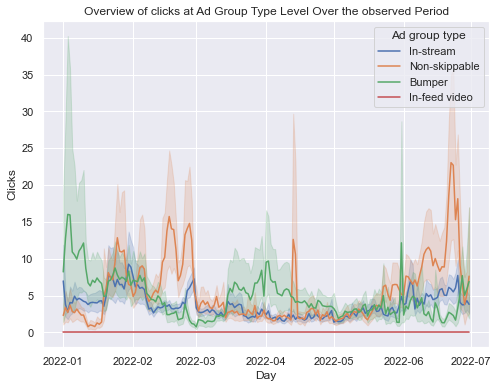

In [19]:
# Overview of Clicks at ad group type level
fig, ax = plt.subplots(figsize = (8, 6))
sns.lineplot(x = 'Day', y = 'Clicks', hue = 'Ad group type', data = data, ax = ax)
ax.set_title('Overview of clicks at Ad Group Type Level Over the observed Period')

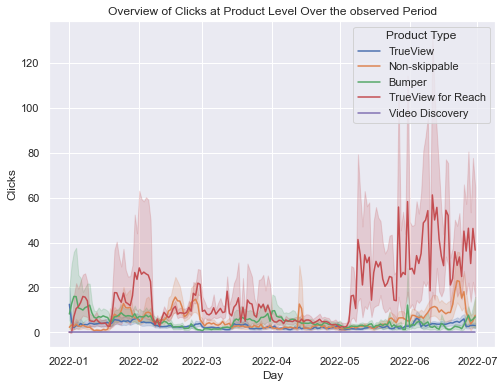

In [20]:
# Overview of Clicks at product type level
fig, ax = plt.subplots(figsize = (8, 6))
sns.lineplot(x = 'Day', y = 'Clicks', hue = 'Product Type', data = data, ax = ax)
ax.set_title('Overview of Clicks at Product Level Over the observed Period')
plt.show()

> <mark>**<font size = "3.5">Through overview analysis from different level, I got some fundamental ideas. Spikes shown on the graphic inspired me to consider that seasonality analysis can be meaningful.</font>**<mark>

### Feature Engineering

In [21]:
# Feature engineering:get day of week and month for seasonality analysis
data['Day of week'] = data['Day'].apply(lambda time: time.strftime("%A"))
data['Month'] = data['Day'].apply(lambda time: time.strftime("%B"))
data.head()

,Day,Campaign,Ad group,Ad group type,Ad group bid strategy type,Cost,Views,Impr.,Clicks,Product Type,Day of week,Month
0,2022-05-31,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,4.76,71.0,207.0,1.0,TrueView,Tuesday,May
1,2022-06-07,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,6.40,45.0,225.0,1.0,TrueView,Tuesday,June
2,2022-06-20,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,5.21,78.0,299.0,1.0,TrueView,Monday,June
3,2022-06-29,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,4.74,90.0,283.0,0.0,TrueView,Wednesday,June
4,2022-06-13,Alvin test on EOS video,Targeting used for nordic test 20190130,In-stream,Manual CPV,5.22,72.0,249.0,1.0,TrueView,Monday,June


Text(0.5, 1.0, 'Trend of Clicks & Views over the day of week')

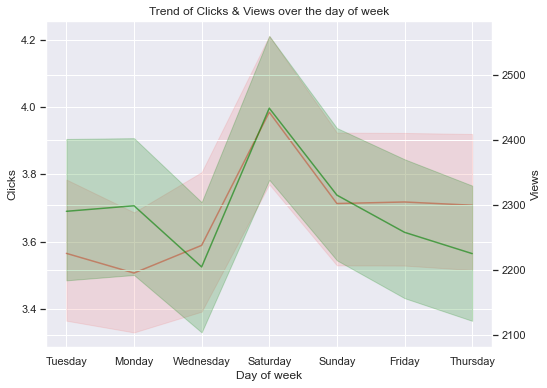

In [22]:
# Trend over day of week
fig, ax = plt.subplots(figsize = (8, 6))
sns.lineplot(x = 'Day of week', y = 'Clicks', data = data, ax = ax, color = 'lightcoral')
ax2 = ax.twinx()
sns.lineplot(x = 'Day of week', y = 'Views', data = data, ax = ax2, color = 'green', alpha = 0.6, sort = False)
#sns.lineplot(x = 'Day of week', y = 'Impr.', data = data, ax = ax2, color = 'skyblue')
ax.set_title('Trend of Clicks & Views over the day of week')

Text(0.5, 1.0, 'Trend of Clicks & Views over month')

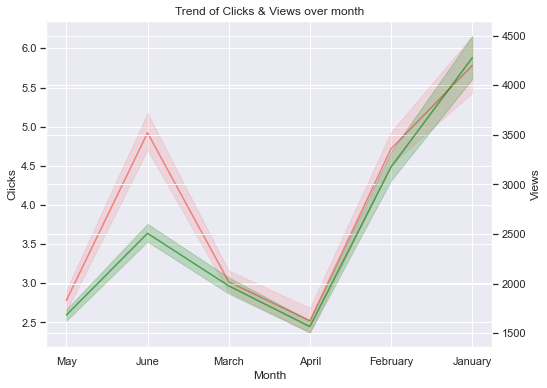

In [23]:
# Trend over month
fig, ax = plt.subplots(figsize = (8, 6))
sns.lineplot(x = 'Month', y = 'Clicks', data = data, ax = ax, color = 'lightcoral')
ax2 = ax.twinx()
sns.lineplot(x = 'Month', y = 'Views', data = data, ax = ax2, color = 'green', alpha = 0.6, sort = False)
#sns.lineplot(x = 'Month', y = 'Impr.', data = data, ax = ax2, color = 'skyblue')
ax.set_title('Trend of Clicks & Views over month')

> <mark style = "background-color: Orange;">**<font size = "3.5">Insights:<br><br>1.Saturday has the most clicks and views relatively.<br><br>2.January and June have higher clicks and views, while clicks and views keep on a low level in April and May.<br><br>3.People tend to pay attention on Ads when they relax and have more time on weekend, or holiday season. </font>**<mark>

In [24]:
data.isnull().sum()

Day                           0
Campaign                      0
Ad group                      0
Ad group type                 0
Ad group bid strategy type    0
Cost                          0
Views                         0
Impr.                         0
Clicks                        0
Product Type                  0
Day of week                   0
Month                         0
dtype: int64

### Metrics Calculation and Analysis:

In [25]:
# Make division by zero equal to zero
def safe_division(numerator, denominator):
    """Return 0 if denominator is 0"""
    return denominator and numerator / denominator

In [26]:
data_ad = data[(data['Ad group'] == 'Topics')]
data_ad.head()

,Day,Campaign,Ad group,Ad group type,Ad group bid strategy type,Cost,Views,Impr.,Clicks,Product Type,Day of week,Month
123,2022-03-05,VD PL026569,Topics,In-feed video,Manual CPV,1008.18,14826.0,726558.0,0.0,Video Discovery,Saturday,March
387,2022-04-01,YT TrV USA PL042588 MHogPnUWjMM,Topics,In-stream,Manual CPV,192.08,1311.0,1896.0,5.0,TrueView,Friday,April
430,2022-03-21,VD PL026569,Topics,In-feed video,Manual CPV,235.91,3244.0,157544.0,0.0,Video Discovery,Monday,March
487,2022-03-31,YT TrV USA PL042588 MHogPnUWjMM,Topics,In-stream,Manual CPV,877.72,5088.0,7556.0,20.0,TrueView,Thursday,March
718,2022-03-25,YT TrV USA PL042588 MHogPnUWjMM,Topics,In-stream,Manual CPV,226.74,1297.0,1847.0,3.0,TrueView,Friday,March


In [27]:
# At campaign level
data_groupby_campaign = data.groupby(['Campaign'], as_index = False).sum()
data_groupby_campaign['Cost per view'] = data_groupby_campaign.apply(lambda x: safe_division(x['Cost'], x['Views']), axis = 1)
data_groupby_campaign['Cost per impression'] = data_groupby_campaign.apply(lambda x: safe_division(x['Cost'], x['Impr.']*1000), axis = 1)
data_groupby_campaign['Cost per click'] = data_groupby_campaign.apply(lambda x: safe_division(x['Cost'], x['Clicks']), axis = 1)
data_groupby_campaign['Click-Through Rate'] = data_groupby_campaign.apply(lambda x: safe_division(x['Clicks'], x['Impr.']), axis = 1)
data_groupby_campaign['Click-Through Rate'] = data_groupby_campaign['Click-Through Rate'].apply(lambda x: "{0:.2%}".format(x))
data_groupby_campaign['View-Through Rate'] = data_groupby_campaign.apply(lambda x: safe_division(x['Views'], x['Impr.']), axis = 1)
data_groupby_campaign['View-Through Rate'] = data_groupby_campaign['View-Through Rate'].apply(lambda x: "{0:.2%}".format(x))
#data_groupby_campaign_sub = data_groupby_campaign[(data_groupby_campaign['Clicks'] > 1000) & (data_groupby_campaign['Views'] > 1000) & (data_groupby_campaign['Impr.'] > 1000)]
data_groupby_campaign.sort_values('Views', ascending=False)[:10]

,Campaign,Cost,Views,Impr.,Clicks,Cost per view,Cost per impression,Cost per click,Click-Through Rate,View-Through Rate
912,YT_TrV In-Stream_LF_Q1'22 PL032746 [OP010660],336360.90,19441114.0,34319966.0,19117.0,0.017302,0.000010,17.594858,0.06%,56.65%
1807,YT_TrV_US_Q1'22 FEB PL034029 - Feeling It All ...,261202.41,17150584.0,31430899.0,12270.0,0.015230,0.000008,21.287890,0.04%,54.57%
1335,YT_TrV_Cross-Platform_Q1'22 PL037482 - Precisi...,250453.21,17050146.0,28712081.0,6279.0,0.014689,0.000009,39.887436,0.02%,59.38%
1808,YT_TrV_US_Q1'22 FEB PL034029 - Feeling It All ...,205411.19,15184584.0,29263818.0,421.0,0.013528,0.000007,487.912565,0.00%,51.89%
1116,YT_TrV_:60_Q1-Q2'22_O-306LX_PL034198 - Move on,246885.30,13932759.0,23316787.0,7049.0,0.017720,0.000011,35.024159,0.03%,59.75%
1810,YT_TrV_US_Q1'22 JAN PL037527 - Feeling It All ...,126551.67,9590217.0,17250983.0,6287.0,0.013196,0.000007,20.129103,0.04%,55.59%
1391,YT_TrV_HM_Q2'22 PL039357 (April),153980.32,9373172.0,13581841.0,12967.0,0.016428,0.000011,11.874784,0.10%,69.01%
1618,YT_TrV_Q1'22 PL035641 O-30ZJQ-R0,114452.85,9193913.0,16268878.0,1931.0,0.012449,0.000007,59.271284,0.01%,56.51%
1357,YT_TrV_GM_Q2'22 PL039354 (April),147928.99,8869967.0,13006902.0,10460.0,0.016678,0.000011,14.142351,0.08%,68.19%
1811,YT_TrV_US_Q1'22 JAN PL037527 - Feeling It All ...,92035.58,8842248.0,16497083.0,146.0,0.010409,0.000006,630.380685,0.00%,53.60%


In [28]:
# At ad group type level
data_groupby_ad = data.groupby(['Ad group type'], as_index = False).sum()
data_groupby_ad['Cost per view'] = data_groupby_ad.apply(lambda x: safe_division(x['Cost'], x['Views']), axis = 1)
data_groupby_ad['Cost per impression'] = data_groupby_ad.apply(lambda x: safe_division(x['Cost'], x['Impr.']*1000), axis = 1)
data_groupby_ad['Cost per click'] = data_groupby_ad.apply(lambda x: safe_division(x['Cost'], x['Clicks']), axis = 1)
data_groupby_ad['Click-Through Rate'] = data_groupby_ad.apply(lambda x: safe_division(x['Clicks'], x['Impr.']), axis = 1)
data_groupby_ad['Click-Through Rate'] = data_groupby_ad['Click-Through Rate'].apply(lambda x: "{0:.2%}".format(x))
data_groupby_ad['View-Through Rate'] = data_groupby_ad.apply(lambda x: safe_division(x['Views'], x['Impr.']), axis = 1)
data_groupby_ad['View-Through Rate'] = data_groupby_ad['View-Through Rate'].apply(lambda x: "{0:.2%}".format(x))
data_groupby_ad

,Ad group type,Cost,Views,Impr.,Clicks,Cost per view,Cost per impression,Cost per click,Click-Through Rate,View-Through Rate
0,Bumper,3487698.76,0.0,8.431345e+08,207666.0,0.000000,0.000004,16.794751,0.02%,0.00%
1,In-feed video,481148.09,5266855.0,3.072403e+08,0.0,0.091354,0.000002,0.000000,0.00%,1.71%
2,In-stream,15362780.28,835778192.0,1.654740e+09,867532.0,0.018381,0.000009,17.708604,0.05%,50.51%
3,Non-skippable,4941340.24,0.0,5.347214e+08,277019.0,0.000000,0.000009,17.837550,0.05%,0.00%


In [29]:
# At product type level
data_groupby_product = data.groupby(['Product Type'], as_index = False).sum()
data_groupby_product['Cost per view'] = data_groupby_product.apply(lambda x: safe_division(x['Cost'], x['Views']), axis = 1)
data_groupby_product['Cost per impression'] = data_groupby_product.apply(lambda x: safe_division(x['Cost'], x['Impr.']*1000), axis = 1)
data_groupby_product['Cost per click'] = data_groupby_product.apply(lambda x: safe_division(x['Cost'], x['Clicks']), axis = 1)
data_groupby_product['Click-Through Rate'] = data_groupby_product.apply(lambda x: safe_division(x['Clicks'], x['Impr.']), axis = 1)
data_groupby_product['Click-Through Rate'] = data_groupby_product['Click-Through Rate'].apply(lambda x: "{0:.2%}".format(x))
data_groupby_product['View-Through Rate'] = data_groupby_product.apply(lambda x: safe_division(x['Views'], x['Impr.']), axis = 1)
data_groupby_product['View-Through Rate'] = data_groupby_product['View-Through Rate'].apply(lambda x: "{0:.2%}".format(x))
data_groupby_product

,Product Type,Cost,Views,Impr.,Clicks,Cost per view,Cost per impression,Cost per click,Click-Through Rate,View-Through Rate
0,Bumper,3487698.76,0.0,8.431345e+08,207666.0,0.000000,0.000004,16.794751,0.02%,0.00%
1,Non-skippable,4941340.24,0.0,5.347214e+08,277019.0,0.000000,0.000009,17.837550,0.05%,0.00%
2,TrueView,13308234.75,788748911.0,1.390424e+09,638082.0,0.016873,0.000010,20.856621,0.05%,56.73%
3,TrueView for Reach,2054545.53,47029281.0,2.643160e+08,229450.0,0.043687,0.000008,8.954219,0.09%,17.79%
4,Video Discovery,481148.09,5266855.0,3.072403e+08,0.0,0.091354,0.000002,0.000000,0.00%,1.71%


In [30]:
# At product type level
data_groupby_bid = data.groupby(['Ad group bid strategy type'], as_index = False).sum()
data_groupby_bid['Cost per view'] = data_groupby_bid.apply(lambda x: safe_division(x['Cost'], x['Views']), axis = 1)
data_groupby_bid['Cost per impression'] = (data_groupby_bid['Cost'] / data_groupby_bid['Impr.'])*1000
data_groupby_bid['Cost per click'] = data_groupby_bid.apply(lambda x: safe_division(x['Cost'], x['Clicks']), axis = 1)
data_groupby_bid['Click-Through Rate'] = data_groupby_bid['Clicks'] / data_groupby_bid['Impr.']
data_groupby_bid['View-Through Rate'] = data_groupby_bid['Views'] / data_groupby_bid['Impr.']
data_groupby_bid

,Ad group bid strategy type,Cost,Views,Impr.,Clicks,Cost per view,Cost per impression,Cost per click,Click-Through Rate,View-Through Rate
0,Manual CPV,13789382.84,794015766.0,1.697664e+09,638082.0,0.017367,8.122561,21.610675,0.000376,0.467711
1,Target CPM,10483584.53,47029281.0,1.642172e+09,714135.0,0.222916,6.383975,14.680116,0.000435,0.028638


> <mark style = "background-color: Orange;">**<font size = "3.5">Insights:<br><br>1.In current campaign model, the trend is more cost, more views, and more impressions.<br><br>2.Bumper and Non-skippable ad types have realtively higher impressions and Click-Through Rate while Views are 0. These ad types could be good for brand awareness and reach.<br><br>3.In-stream ad has highest views, impressions, Click-Through Rate and View-Through Rate, which could be good for sales and product consideration.<br><br>4.In-feed video has zero clicks but good views which could be good for helping engagement.<br><br>5.TrueView product type has highest views, highest impressions, View-Through Rate and higher Click-Through Rate. It seems like an optimal product type.<br><br>6.TrueView for Reach has high Click-Through Rate and View-Through Rate, performs good.<br><br>7.Manual CPV ad bid strategy has much higher views, cost and View_Through Rate than target CPM ad bid strategy. The choice between CPV and CPM depends on the type of campaign you want to run and the audience that you're tring to reach.</font>**<mark>

In [31]:
# At ad group type and month level
data_groupby_ad_month = data.groupby(['Ad group type', 'Month'], as_index = False).sum()
data_groupby_ad_month['Cost per view'] = data_groupby_ad_month.apply(lambda x: safe_division(x['Cost'], x['Views']), axis = 1)
data_groupby_ad_month['Cost per impression'] = data_groupby_ad_month.apply(lambda x: safe_division(x['Cost'], x['Impr.']*1000), axis = 1)
data_groupby_ad_month['Cost per click'] = data_groupby_ad_month.apply(lambda x: safe_division(x['Cost'], x['Clicks']), axis = 1)
data_groupby_ad_month['Click-Through Rate'] = data_groupby_ad_month.apply(lambda x: safe_division(x['Clicks'], x['Impr.']), axis = 1)
data_groupby_ad_month['Click-Through Rate'] = data_groupby_ad_month['Click-Through Rate'].apply(lambda x: "{0:.2%}".format(x))                                                                          
data_groupby_ad_month['View-Through Rate'] = data_groupby_ad_month.apply(lambda x: safe_division(x['Views'], x['Impr.']), axis = 1)
data_groupby_ad_month['View-Through Rate'] = data_groupby_ad_month['View-Through Rate'].apply(lambda x: "{0:.2%}".format(x))
data_groupby_ad_month['Month'] = pd.Categorical(data_groupby_ad_month['Month'], categories = ['January', 'February', 'March', 'April', 'May', 'June'])
data_groupby_ad_month.sort_values('Month').sample(5)


,Ad group type,Month,Cost,Views,Impr.,Clicks,Cost per view,Cost per impression,Cost per click,Click-Through Rate,View-Through Rate
14,In-stream,January,1676945.48,115909114.0,234666466.0,95662.0,0.014468,0.000007,17.529902,0.04%,49.39%
6,In-feed video,April,74454.58,533809.0,32737859.0,0.0,0.139478,0.000002,0.000000,0.00%,1.63%
21,Non-skippable,June,1125665.53,0.0,105849682.0,53271.0,0.000000,0.000011,21.130925,0.05%,0.00%
17,In-stream,May,2289738.79,127253824.0,243738121.0,141140.0,0.017993,0.000009,16.223174,0.06%,52.21%
5,Bumper,May,544242.42,0.0,126429148.0,33716.0,0.000000,0.000004,16.141963,0.03%,0.00%


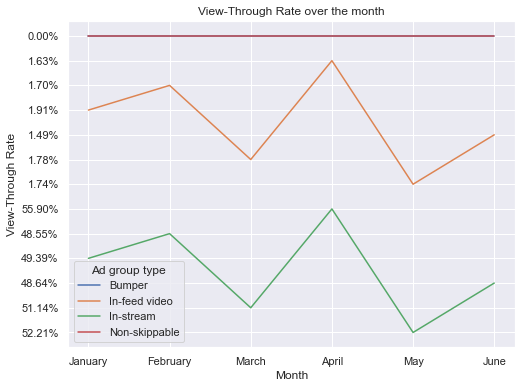

In [32]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.lineplot(x = 'Month', y = 'View-Through Rate', hue = 'Ad group type', data = data_groupby_ad_month, ax = ax)
ax.set_title('View-Through Rate over the month')
plt.show()

In [33]:
# At ad group type and month level
data_groupby_pt_month = data.groupby(['Product Type', 'Month'], as_index = False).sum()
data_groupby_pt_month['Cost per view'] = data_groupby_pt_month.apply(lambda x: safe_division(x['Cost'], x['Views']), axis = 1)
data_groupby_pt_month['Cost per impression'] = data_groupby_pt_month.apply(lambda x: safe_division(x['Cost'], x['Impr.']*1000), axis = 1)
data_groupby_pt_month['Cost per click'] = data_groupby_pt_month.apply(lambda x: safe_division(x['Cost'], x['Clicks']), axis = 1)
data_groupby_pt_month['Click-Through Rate'] = data_groupby_pt_month.apply(lambda x: safe_division(x['Clicks'], x['Impr.']), axis = 1)
data_groupby_pt_month['Click-Through Rate'] = data_groupby_pt_month['Click-Through Rate'].apply(lambda x: "{0:.2%}".format(x))                                                                          
data_groupby_pt_month['View-Through Rate'] = data_groupby_pt_month.apply(lambda x: safe_division(x['Views'], x['Impr.']), axis = 1)
data_groupby_pt_month['View-Through Rate'] = data_groupby_pt_month['View-Through Rate'].apply(lambda x: "{0:.2%}".format(x))
data_groupby_pt_month['Month'] = pd.Categorical(data_groupby_pt_month['Month'], categories = ['January', 'February', 'March', 'April', 'May', 'June'])
data_groupby_pt_month.sort_values('Month').sample(5)


,Product Type,Month,Cost,Views,Impr.,Clicks,Cost per view,Cost per impression,Cost per click,Click-Through Rate,View-Through Rate
9,Non-skippable,June,1125665.53,0.0,105849682.0,53271.0,0.000000,0.000011,21.130925,0.05%,0.00%
17,TrueView,May,2022032.47,121279138.0,206434807.0,102677.0,0.016673,0.000010,19.693139,0.05%,58.75%
13,TrueView,February,2710084.54,164027857.0,291412462.0,101499.0,0.016522,0.000009,26.700603,0.03%,56.29%
20,TrueView for Reach,January,251890.36,7355908.0,40971782.0,30592.0,0.034243,0.000006,8.233864,0.07%,17.95%
0,Bumper,April,695355.07,0.0,173544749.0,40139.0,0.000000,0.000004,17.323677,0.02%,0.00%


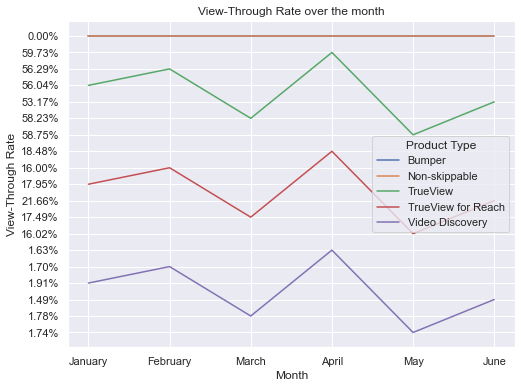

In [34]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.lineplot(x = 'Month', y = 'View-Through Rate', hue = 'Product Type', data = data_groupby_pt_month, ax = ax)
ax.set_title('View-Through Rate over the month')
plt.show()

> <mark style = "background-color: Orange;">**<font size = "3.5">Insights:<br><br>For ad types and product type, their View-Through Rates show bi-monthly cycle trend. VTR measures the number of post-impression response or view through from display media impressions viewed during and following an online advertising campaign.</font>**<mark>

### Summary and Future Study

> <mark>**There are more metrics in the world of online advertising. The key is not to pick one and run with it, but to use a combination and discover what works best for you. Ultimately, overall conversions/return on investment(ROI) are the key to a successful campaign.<br><br>For further study, one thought is to segment campaigns to groups according to their cost, to calculate an ANOVA table to compare if there are any statistical difference between the means of groups**<mark>